<a href="https://colab.research.google.com/github/supersamk13/UMD_Baseball_Data_Science_and_Machine_Learning/blob/main/HitPredictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

UMD Division I Baseball Team ML Project: Predict whether a ball-in-play will result in a hit based off of the ball exit speed, angle, and bearing

In [542]:
# Import modules/libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from datetime import datetime
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, r2_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.neural_network import MLPClassifier
import xgboost as xgb
import warnings
import math
import joblib
%matplotlib inline

In [543]:
# Define Metrics
def calcMetrics(y_test, y_pred):
  print("Accuracy: ", accuracy_score(y_test, y_pred))
  print("r2 Score: ", r2_score(y_test, y_pred))
  print("f1_score: ", f1_score(y_test, y_pred))

In [544]:
# Set up data frame
url='https://raw.githubusercontent.com/supersamk13/UMD_Baseball_Data_Science_and_Machine_Learning/main/Hit_Prediction_CSV.csv'
baseball_df=pd.read_csv(url)

In [545]:
# Learn about features
baseball_df.describe()

,Unnamed: 1,RelSpeed,PlateLocHeight,Unnamed: 4,ExitSpeed,Angle,Direction,Bearing,Unnamed: 9,Unnamed: 10,Unnamed: 11
count,0.0,327170.000000,327170.000000,0.0,327170.000000,327170.000000,327170.000000,302719.000000,0.0,0.0,0.0
mean,NaN,85.320792,2.303498,NaN,84.910249,10.863445,-1.897804,-1.166439,NaN,NaN,NaN
std,NaN,5.822151,0.576740,NaN,16.625250,29.647377,28.512659,23.817684,NaN,NaN,NaN
min,NaN,48.571530,-0.661530,NaN,0.000000,-89.499183,-179.967264,-179.607803,NaN,NaN,NaN
25%,NaN,81.013500,1.903570,NaN,76.713735,-5.984611,-19.298373,-20.160123,NaN,NaN,NaN
50%,NaN,86.463385,2.302520,NaN,88.746390,12.349680,-2.323360,-1.815574,NaN,NaN,NaN
75%,NaN,89.844820,2.701870,NaN,96.857600,29.181596,15.263425,17.334534,NaN,NaN,NaN
max,NaN,103.354610,5.318290,NaN,129.915570,89.919922,179.989845,179.961984,NaN,NaN,NaN


In [546]:
# Select Features (add direction)
baseball_df = baseball_df[['ExitSpeed', 'Angle', 'Bearing', 'HitCheck']]

In [547]:
# Remove outliers
for column in baseball_df.columns:
  # Handling missing data
  baseball_df=baseball_df[baseball_df[column].notna()]

In [548]:
# Binary Encode HitCheck
baseball_df.HitCheck = baseball_df.HitCheck.apply(lambda x: 0 if x==False else 1)

In [549]:
# Learn about updated features
baseball_df.describe()

,ExitSpeed,Angle,Bearing,HitCheck
count,302719.000000,302719.000000,302719.000000,302719.000000
mean,85.201327,7.756260,-1.166439,0.380075
std,16.710553,27.336846,23.817684,0.485406
min,0.000000,-89.499183,-179.607803,0.000000
25%,76.859840,-7.087917,-20.160123,0.000000
50%,89.293720,10.869239,-1.815574,0.000000
75%,97.243395,25.908826,17.334534,1.000000
max,129.915570,88.595484,179.961984,1.000000


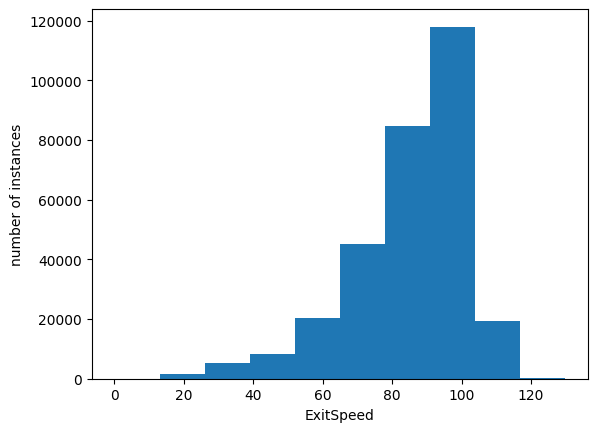

<Figure size 1000x600 with 0 Axes>

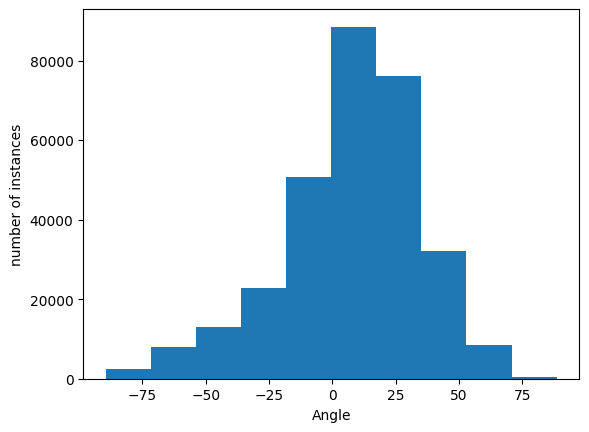

<Figure size 1000x600 with 0 Axes>

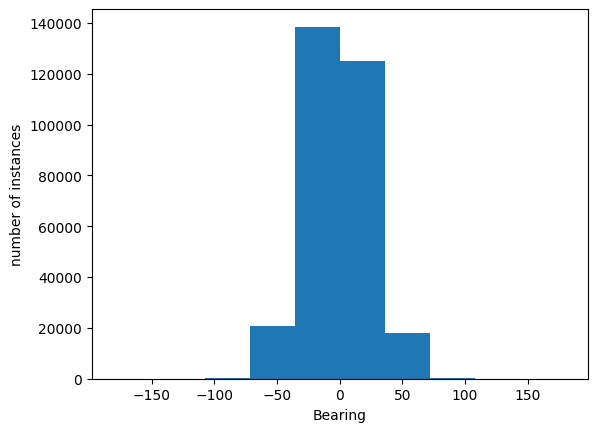

<Figure size 1000x600 with 0 Axes>

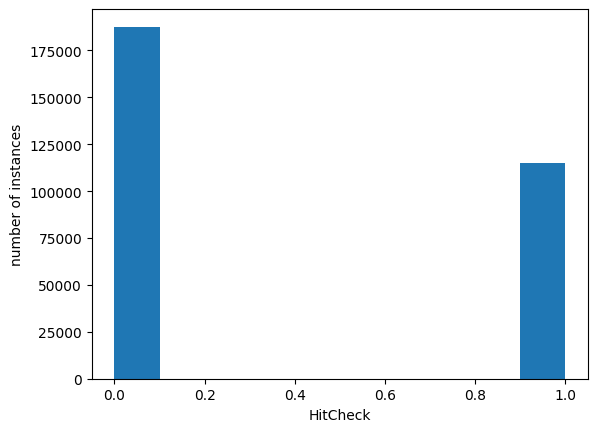

<Figure size 1000x600 with 0 Axes>

In [550]:
# Plot feature distribution
for (columnName, columnData) in baseball_df.items():
  # Make histogram
  plt.hist(columnData)

  # Labels and title
  plt.xlabel(columnName)
  plt.ylabel('number of instances')

  # Manipulate figure size
  plt.figure(figsize=(10,6))

  # Show plot
  plt.show()

In [551]:
# Split data into x, y, training, and testing data
x = baseball_df.drop('HitCheck', axis = 1)
y = baseball_df[['HitCheck']]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

In [552]:
# Grid Search Logistic Regression

# Only output desired information
warnings.filterwarnings('ignore')

# Create parameter grid
parameters={'penalty' : ['l2'],
            'C' : [.00001],
            'solver' : ['lbfgs'],
            'l1_ratio' : [.00001]}

# Tune Model
tuned_logreg=GridSearchCV(estimator=LogisticRegression(), param_grid=parameters)

# Train Model
tuned_logreg.fit(x_train,y_train)

# Make Predictions
tuned_logreg_pred=tuned_logreg.predict(x_test)

# Print Results
print(tuned_logreg.best_params_)
calcMetrics(y_test, tuned_logreg_pred)

{'C': 1e-05, 'l1_ratio': 1e-05, 'penalty': 'l2', 'solver': 'lbfgs'}
Accuracy:  0.6829963883016209
r2 Score:  -0.34547211579841397
f1_score:  0.47044973788282896


In [553]:
# Grid Search DecisionTreeClassifier

# Only output desired information
warnings.filterwarnings('ignore')

# Tune Model
tuned_dtc=estimator=DecisionTreeClassifier()

# Train Model
tuned_dtc.fit(x_train,y_train)

# Make Predictions
tuned_dtc_pred=tuned_dtc.predict(x_test)

# Print Results
calcMetrics(y_test, tuned_dtc_pred)

Accuracy:  0.7297172304439746
r2 Score:  -0.14717282831594947
f1_score:  0.6463520055325035


In [554]:
# Grid Search Neural Network

# Only output desired information
warnings.filterwarnings('ignore')

# Create parameter grid
parameters={'activation' : ['relu'],
            'hidden_layer_sizes' : [(3,3,3,3,3)]}

# Tune Model
tuned_mlpc=GridSearchCV(estimator=MLPClassifier(), param_grid=parameters)

# Train Model
tuned_mlpc.fit(x_train,y_train)

# Make Predictions
tuned_mlpc_pred=tuned_mlpc.predict(x_test)

# Print Results
print(tuned_mlpc.best_params_)
calcMetrics(y_test, tuned_mlpc_pred)

{'activation': 'relu', 'hidden_layer_sizes': (3, 3, 3, 3, 3)}
Accuracy:  0.718540785764623
r2 Score:  -0.19460949501279168
f1_score:  0.5680001352059355


In [555]:
# Grid Search RandomForestClassifier

# Only output desired information
warnings.filterwarnings('ignore')

# Tune Model
tuned_rfc=estimator=RandomForestClassifier()

# Train Model
tuned_rfc.fit(x_train,y_train)

# Make Predictions
tuned_rfc_pred=tuned_rfc.predict(x_test)

# Print Results
calcMetrics(y_test, tuned_rfc_pred)

Accuracy:  0.797216349541931
r2 Score:  0.1393165971536492
f1_score:  0.718848279441849


In [556]:
# Grid Search xgboost

# Only output desired information
warnings.filterwarnings('ignore')


# Create parameter grid
parameters={'n_estimators' : [100],
            'max_depth' : [5],
            'eta' : [.3]}

# Tune Model
tuned_xgb=GridSearchCV(estimator=xgb.XGBClassifier(), param_grid=parameters)

# Train Model
tuned_xgb.fit(x_train,y_train)

# Make Predictions
tuned_xgb_pred=tuned_xgb.predict(x_test)

# Print Results
print(tuned_xgb.best_params_)
calcMetrics(y_test, tuned_xgb_pred)

{'eta': 0.3, 'max_depth': 5, 'n_estimators': 100}
Accuracy:  0.8089543692741367
r2 Score:  0.18913678109338694
f1_score:  0.7344333557827711


In [557]:
x_test['Hit Prediction'] = tuned_xgb_pred
x_test['HitCheck'] = y_test

In [558]:
x_test.head(50)

,ExitSpeed,Angle,Bearing,Hit Prediction,HitCheck
10757,57.14871,-41.049774,8.320940,0,0
208233,78.16676,8.507326,-25.522758,1,1
154763,65.30776,-54.259870,-9.591459,0,0
313864,74.11857,29.053093,-23.370479,0,0
320197,84.86866,17.503328,-4.026132,1,1
194184,99.76790,12.495141,21.979362,1,1
234164,68.96667,-27.812818,1.009024,0,0
129458,82.90107,-9.727441,31.921982,0,0
314490,79.59076,-38.932365,11.231846,0,0
160855,96.96545,31.398205,0.645065,0,1


In [559]:
# save model
joblib.dump(tuned_xgb,'baseball_hit_xgb.sav')

['baseball_hit_xgb.sav']

In [560]:
# To load model
baseball_hit_predictor_xgb=joblib.load('baseball_hit_xgb.sav')